In [75]:
import glob
import json
import re
import pandas as pd
import os

In [76]:
logs_path = '../results-agg-experiment/logs'

In [77]:
paths = glob.glob(os.path.join(logs_path, '*.txt'))

In [78]:
len(paths)

70

In [79]:
path = paths[0]

In [80]:
rows = []
for path in paths:
    try:
        name = os.path.basename(path)
        t = name[:name.find('-run')].replace('flights-', '')
        r = int(name[name.find('run-')+4:name.rfind('-date')])

        yearmonth = int(name[name.find('date-')+5:].replace('.txt', ''))
        year = yearmonth // 100
        month = yearmonth % 100
        row = {'type' : t, 'run' : r, 'year' : int(year), 'month' : int(month)}

        with open(path, 'r') as fp:
            lines = fp.readlines()

        row.update({'t_' + k : v for k, v in json.loads(lines[-1]).items()})
        rows.append(row)
    except Exception as e:
        print('ERROR: {}'.format(path))

ERROR: ../results-agg-experiment/logs/flights-specialized-run-4-date-198801.txt


In [81]:
df = pd.DataFrame(rows)

In [82]:
gdf = df.groupby(['type', 'year', 'month']).mean().reset_index()

In [83]:
import matplotlib.pyplot as plt
import numpy as np

In [84]:
import seaborn as sns

In [85]:
gdf = gdf.sort_values(by=['year', 'month', 'type']).reset_index(drop=True)

In [86]:
gdf

,type,year,month,run,t_output,t_transform,t_total
0,general,1987,10,6,0.000235,2.010697,2.010934
1,specialized,1987,10,6,0.000252,1.989872,1.990122
2,general,1987,11,6,0.000255,1.863666,1.863921
3,specialized,1987,11,6,0.000248,1.867912,1.868159
4,general,1987,12,6,0.000244,1.940159,1.940403
5,specialized,1987,12,6,0.030427,2.049450,2.079878
6,specialized,1988,1,2,0.000202,1.913937,1.914140


In [87]:
gdf_general = gdf.iloc[::2]
gdf_special = gdf.iloc[1::2]

In [88]:
gdf_general.head()

,type,year,month,run,t_output,t_transform,t_total
0,general,1987,10,6,0.000235,2.010697,2.010934
2,general,1987,11,6,0.000255,1.863666,1.863921
4,general,1987,12,6,0.000244,1.940159,1.940403
6,specialized,1988,1,2,0.000202,1.913937,1.914140


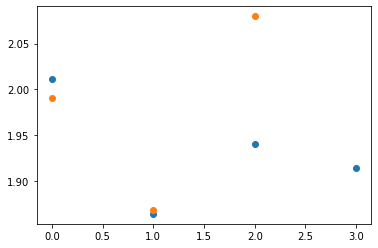

In [89]:
plt.scatter(np.arange(len(gdf_general)), gdf_general['t_total'])
plt.scatter(np.arange(len(gdf_special)), gdf_special['t_total'])

In [90]:
gdf_general.sum()['t_total'], gdf_special.sum()['t_total']

(7.729397272727273, 5.938159090909091)

In [91]:
#is there any effect when using up to 2004?

In [92]:
gdf_general[gdf_general['year'] <= 2003]['t_total'].sum(), gdf_special[gdf_special['year'] <= 2003]['t_total'].sum()

(7.729397272727273, 5.938159090909091)

In [93]:
# basically a difference not worth talking about...

In [94]:
!cat ../results-agg-experiment/logs/flights-general-run-1-date-199206.txt

cat: ../results-agg-experiment/logs/flights-general-run-1-date-199206.txt: No such file or directory
